In [ ]:
import pandas as pd

In [ ]:
# mlflow for pkl file
!pip install mlflow

In [ ]:
import mlflow
mlflow.end_run()

In [ ]:
# starting the MLflow run
mlflow.start_run(run_name = 'Classification')

<ActiveRun: >

In [ ]:
# meaningful tag - for run
mlflow.set_tag('Run Info', 'AI Systems: KNN Classifier, Hazardous Asteroid')

In [ ]:
df = pd.read_csv('/content/HarazdousAsteroid.csv')
df.head()

,Object Name,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous
0,433 Eros,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,Amor Asteroid,False
1,719 Albert,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,Amor Asteroid,False
2,887 Alinda,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,Amor Asteroid,False
3,1036 Ganymed,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,Amor Asteroid,False
4,1221 Amor,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,Amor Asteroid,False


In [ ]:
df.isnull().sum() # checking if code is clean.

Object Name                                 0
Epoch (TDB)                                 0
Orbit Axis (AU)                             0
Orbit Eccentricity                          0
Orbit Inclination (deg)                     0
Perihelion Argument (deg)                   0
Node Longitude (deg)                        0
Mean Anomoly (deg)                          0
Perihelion Distance (AU)                    0
Aphelion Distance (AU)                      0
Orbital Period (yr)                         0
Minimum Orbit Intersection Distance (AU)    0
Orbital Reference                           0
Asteroid Magnitude                          1
Classification                              0
Hazardous                                   0
dtype: int64

In [ ]:
df['Asteroid Magnitude'].value_counts() # behavior of column

Asteroid Magnitude
20.70    204
21.00    198
20.80    194
20.00    188
24.40    187
        ... 
22.51      1
27.91      1
25.21      1
26.87      1
24.74      1
Name: count, Length: 477, dtype: int64

In [ ]:
# filling that one value with the mean
df['Asteroid Magnitude'] = df['Asteroid Magnitude'].fillna(df['Asteroid Magnitude'].mean())
df['Asteroid Magnitude'].isnull().sum() # checking it worked

0

In [ ]:
df.isnull().sum() # rechecking one last time

Object Name                                 0
Epoch (TDB)                                 0
Orbit Axis (AU)                             0
Orbit Eccentricity                          0
Orbit Inclination (deg)                     0
Perihelion Argument (deg)                   0
Node Longitude (deg)                        0
Mean Anomoly (deg)                          0
Perihelion Distance (AU)                    0
Aphelion Distance (AU)                      0
Orbital Period (yr)                         0
Minimum Orbit Intersection Distance (AU)    0
Orbital Reference                           0
Asteroid Magnitude                          0
Classification                              0
Hazardous                                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               15635 non-null  object 
 1   Epoch (TDB)                               15635 non-null  int64  
 2   Orbit Axis (AU)                           15635 non-null  float64
 3   Orbit Eccentricity                        15635 non-null  float64
 4   Orbit Inclination (deg)                   15635 non-null  float64
 5   Perihelion Argument (deg)                 15635 non-null  float64
 6   Node Longitude (deg)                      15635 non-null  float64
 7   Mean Anomoly (deg)                        15635 non-null  float64
 8   Perihelion Distance (AU)                  15635 non-null  float64
 9   Aphelion Distance (AU)                    15635 non-null  float64
 10  Orbital Period (yr)               

In [ ]:
df['Classification'].value_counts() # type of asteroid

Classification
Apollo Asteroid     8460
Amor Asteroid       6017
Aten Asteroid       1142
Apohele Asteroid      16
Name: count, dtype: int64

In [ ]:
df['Hazardous'].value_counts() # our target

Hazardous
False    13856
True      1779
Name: count, dtype: int64

In [ ]:
# target = classification, let's use KNN Classifier

In [ ]:
# needed libraries
from sklearn.model_selection import train_test_split # split data
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.metrics import accuracy_score # accuracy
from sklearn.preprocessing import StandardScaler # scaling
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               15635 non-null  object 
 1   Epoch (TDB)                               15635 non-null  int64  
 2   Orbit Axis (AU)                           15635 non-null  float64
 3   Orbit Eccentricity                        15635 non-null  float64
 4   Orbit Inclination (deg)                   15635 non-null  float64
 5   Perihelion Argument (deg)                 15635 non-null  float64
 6   Node Longitude (deg)                      15635 non-null  float64
 7   Mean Anomoly (deg)                        15635 non-null  float64
 8   Perihelion Distance (AU)                  15635 non-null  float64
 9   Aphelion Distance (AU)                    15635 non-null  float64
 10  Orbital Period (yr)               

In [ ]:
lbl = LabelEncoder()
cols = ['Classification', 'Hazardous']
data[cols] = data[cols].apply(lbl.fit_transform)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               15635 non-null  object 
 1   Epoch (TDB)                               15635 non-null  int64  
 2   Orbit Axis (AU)                           15635 non-null  float64
 3   Orbit Eccentricity                        15635 non-null  float64
 4   Orbit Inclination (deg)                   15635 non-null  float64
 5   Perihelion Argument (deg)                 15635 non-null  float64
 6   Node Longitude (deg)                      15635 non-null  float64
 7   Mean Anomoly (deg)                        15635 non-null  float64
 8   Perihelion Distance (AU)                  15635 non-null  float64
 9   Aphelion Distance (AU)                    15635 non-null  float64
 10  Orbital Period (yr)               

In [ ]:
# downloading to use in top down
from google.colab import files
df.to_csv('Clean-HazardousAsteroid.csv', index = False)
files.download('Clean-HazardousAsteroid.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# the scaled data
data.to_csv('Scaled-HazardousAsteroid.csv', index = False)
files.download('Scaled-HazardousAsteroid.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# dividing the features & target
X = data.drop(['Object Name', 'Hazardous'], axis = 1)
y = data['Hazardous']

In [ ]:
# remembering what we're working with
mlflow.log_param('target', ['Hazardous'])
mlflow.log_param('dropped data', ['Object Name'])

['Object Name']

In [ ]:
# just checking the splits are good to go

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Epoch (TDB)                               15635 non-null  int64  
 1   Orbit Axis (AU)                           15635 non-null  float64
 2   Orbit Eccentricity                        15635 non-null  float64
 3   Orbit Inclination (deg)                   15635 non-null  float64
 4   Perihelion Argument (deg)                 15635 non-null  float64
 5   Node Longitude (deg)                      15635 non-null  float64
 6   Mean Anomoly (deg)                        15635 non-null  float64
 7   Perihelion Distance (AU)                  15635 non-null  float64
 8   Aphelion Distance (AU)                    15635 non-null  float64
 9   Orbital Period (yr)                       15635 non-null  float64
 10  Minimum Orbit Intersection Distanc

In [ ]:
X.head()

,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification
0,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,0
1,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,0
2,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,0
3,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,0
4,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,0


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15635 entries, 0 to 15634
Series name: Hazardous
Non-Null Count  Dtype
--------------  -----
15635 non-null  int64
dtypes: int64(1)
memory usage: 122.3 KB


In [ ]:
y.value_counts()

Hazardous
0    13856
1     1779
Name: count, dtype: int64

In [ ]:
X.isnull().sum().sum()

0

In [ ]:
y.isnull().sum()

0

In [ ]:
# scaling
x_cols = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns = x_cols)
X.head()

,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification
0,0.372348,-0.535638,-1.290346,-0.186986,-0.026041,1.273489,1.261428,0.909642,-0.758857,-0.470107,0.446655,17.130459,-3.689337,-1.226929
1,0.372348,1.421559,0.558004,-0.120233,-0.244260,0.108804,0.445392,1.156416,1.254057,1.197065,0.929978,1.668541,-2.250254,-1.226929
2,0.372348,1.156643,0.667098,-0.317183,1.625650,-0.600960,1.537540,0.658291,1.079021,0.940070,-0.088586,4.939332,-2.946584,-1.226929
3,0.372348,1.461843,0.477888,1.216658,-0.472183,0.414806,-0.691279,1.358246,1.254057,1.236603,2.267609,17.100725,-4.256349,-1.226929
4,0.372348,0.228939,-0.080083,-0.093930,-1.490984,-0.012839,1.213433,0.700321,0.098819,0.122958,0.046404,1.430666,-1.520765,-1.226929


In [ ]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# KNN Classifier Model
knn = KNeighborsClassifier(n_neighbors = 3)
mlflow.log_param('n_neighbors', 3)

labels = knn.fit(X_train, y_train)

In [ ]:
# predicting y
y_pred = knn.predict(X_test)
mlflow.log_param('y_pred result', y_pred)

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
knn_accuracy = round(accuracy_score(y_test, y_pred), 2)
knn_precision = round(precision_score(y_test, y_pred), 2)
knn_recall = round(recall_score(y_test, y_pred), 2)
knn_f1 = round(f1_score(y_test, y_pred), 2)
knn_matrix = confusion_matrix(y_test, y_pred)

print(
    f'Accuracy: {knn_accuracy}\n\n'
    f'Precision: {knn_precision}\n\n'
    f'Recall: {knn_recall}\n\n'
    f'F1: {knn_f1}\n\n'
    f'Confusion Matrix:\n {knn_matrix}\n\n')

Accuracy: 0.93

Precision: 0.73

Recall: 0.59

F1: 0.65

Confusion Matrix:
 [[4057  113]
 [ 214  307]]




In [ ]:
# Logging Metrics.
mlflow.log_metric('Accuracy', knn_accuracy)
mlflow.log_metric('Precision', knn_precision)
mlflow.log_metric('Recall', knn_recall)
mlflow.log_metric('F1', knn_f1)

In [ ]:
# extracting model's features & predictions
from mlflow.models import infer_signature # model schema extraction

In [ ]:
# scehma of input (X) * predictions (y_pred)
signature = infer_signature(X, y_pred) # similar to SQL schema size (or smthn like it)

# Path within MLflow artifacts directory where model is saved
cluster_model_info = mlflow.sklearn.log_model(sk_model = knn,
      artifact_path = 'kmeans_classification', signature = signature)

In [ ]:
# graphing the model
import matplotlib.pyplot as plt

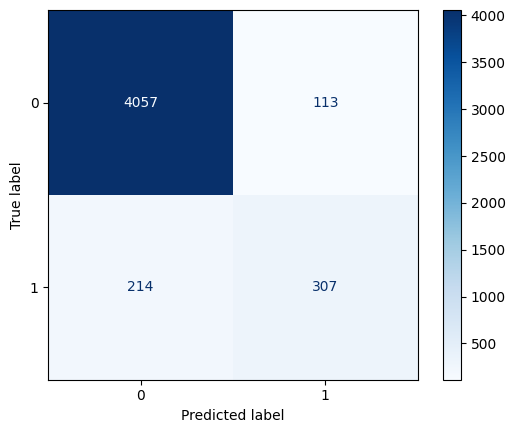

'\nTN (0, 0) = 4057, class was 0 and it actually predicted 0\nFP (0, 1) = 113, class was 0 but it predicted 1\nFN (1, 0) = 214, class was 1 but it predicted 0\nTP (1, 1) = 126, class was 1 and it actually predicted 1\n'

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(knn_matrix, display_labels = knn.classes_)
cmd.plot(cmap = plt.cm.Blues)
plt.show()
mlflow.sklearn.log_model(knn, 'KNN ConfusionMatrixDisplay Model')

'''
TN (0, 0) = 4057, class was 0 and it actually predicted 0
FP (0, 1) = 113, class was 0 but it predicted 1
FN (1, 0) = 214, class was 1 but it predicted 0
TP (1, 1) = 126, class was 1 and it actually predicted 1
'''

In [ ]:
mlflow.end_run()

In [ ]:
import shutil
shutil.make_archive('/content/mlruns', 'zip', '/content/mlruns')

'/content/mlruns.zip'

In [ ]:
from google.colab import files
files.download('/content/mlruns.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>